<a href="https://colab.research.google.com/github/brucecastillo/ProgrammingAssessment/blob/main/Business_Report_Castillo_21716427.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ***Business Report*** : it includes codes, analysis and design  discussion.

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plot_main
import seaborn as sns

In [ ]:
try:
    conn = sqlite3.connect('cardiohealth.db')

    # Create a cursor
    c = conn.cursor()


except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)

In [ ]:
try:
    #  Get the table names in the database and  store in Variable tables_query
    tables_query = "SELECT * FROM sqlite_master WHERE type='table';"

    # Read the query using pandas.real_sql_query
    tables = pd.read_sql_query(tables_query, conn)

    # Display the tables in the cardiohealth.db
    tables

except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)

In [ ]:
try:
    # Query the Table Source using execute function
    c.execute("select * from medical_examination")

    # Display or extract information and observe from the tables
    data = c.fetchall()

    # Defining column names
    columns = ['ID', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
               'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

    # Create Pandas DataFrame to manipulate the data
    df = pd.DataFrame(data, columns=columns)

    # Print the DataFrame
    df.head()

except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)


In [ ]:
## Number/Count of Data
df.count()

ID             70000
age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64

In [ ]:
## DATA EXTRACTION and Initial Exploration

In [ ]:
try:

    print(df.describe())

except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)

                 ID           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349843    164.359229     74.205690   
std    28851.302323   2467.251667      0.477253      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

In [ ]:
try:

    # Check for missing values
    print("Missing values:")
    print(df.isnull().sum()) #### add din yung dupilcate na records

except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)

Missing values:
ID             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [ ]:
### Cleaning and Pre-processing
try:
    # Example: Remove rows with missing values
    df = df.dropna()
    # Drop duplicate rows on all columns
    df = df.drop_duplicates()


except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)

In [ ]:
# Data Cleaning and Data checking for 'Inconsistent Values'

try:


        # Check for inconsistent values
        print("Inconsistent values for Gender:")

        # You can add specific checks based on your data, like negative values or outliers
        # For example, check if all ages are positive
        print("Inconsistent gender:", (df['gender'] >= 3).sum())
        #print(df.count)

        # Filter the DataFrame to include only rows where gender is less than 3
        filtered_df = df[df['gender'] < 3]


        # make it df variable again it will store here the filtered gender wihout greater than or equal to 3
        df = filtered_df
        # Print the resulting DataFrame
        print(df)



except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)

Inconsistent values for Gender:
Inconsistent gender: 11
          ID    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80       

In [ ]:
# Data Cleaning and Data checking for 'Inconsistent Values'
try:

        # Check for inconsistent values "ages"
        print("Inconsistent values for ages:")
        print("Negative ages:", (df['age'] < 0).sum())

        # Check for inconsistent values "cholesterol"
        print("Inconsistent values for cholesterol:")
        print("Negative cholesterol:", (df['cholesterol'] >= 4).sum()) # No negative values

        # Checking Incosistent Values
        print("Inconsistent values for gluc:")
        print("Negative gluc:", (df['gluc'] >= 4).sum()) # No negative values

        # Checking Incosistent Values
        print("Inconsistent values for smoke:")
        print("Negative smoke:", (df['smoke'] >= 2).sum()) # No negative values

        # Checking Incosistent Values
        print("Inconsistent values for alco:")
        print("Negative gluc:", (df['alco'] >= 2).sum()) # No negative values

        # Checking Incosistent Values
        print("Inconsistent values for active:")
        print("Negative gluc:", (df['active'] >= 2).sum()) # No negative values

        # Checking Incosistent Values
        print("Inconsistent values for cardio:")
        print("Negative gluc:", (df['cardio'] >= 2).sum()) # No negative values

        print('============')
        print('checked all this rows, No Inconsistent Values')





except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)

Inconsistent values for ages:
Negative ages: 0
Inconsistent values for cholesterol:
Negative cholesterol: 0
Inconsistent values for gluc:
Negative gluc: 0
Inconsistent values for smoke:
Negative smoke: 0
Inconsistent values for alco:
Negative gluc: 0
Inconsistent values for active:
Negative gluc: 0
Inconsistent values for cardio:
Negative gluc: 0
checked all this rows, No Inconsistent Values


In [ ]:
#### Data Manipulation:

In [ ]:
try:
    # Grouping and Aggregation
    # Example: Group by gender and calculate average height and weight
    gender_stats = df.groupby('gender').agg({'height': 'mean', 'weight': 'mean'}).reset_index()
    print("Gender statistics | Average of height and weight by gender:")
    print(gender_stats)

except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)

Gender statistics | Average of height and weight by gender:
   gender      height     weight
0       1  161.356245  72.565902
1       2  169.948502  77.258565


In [ ]:
try:
    # Example: Filter by non-smokers with cardiovascular disease
    non_smokers_with_cardio = df[(df['smoke'] == 0) & (df['cardio'] == 1)]

    # Print the DataFrame
    print("Non-smokers with cardiovascular disease:")
    print(non_smokers_with_cardio)

    # Count plot to visualize the distribution of gender
    plt.figure(figsize=(8, 6))
    sns.countplot(x='gender', data=non_smokers_with_cardio)
    plt.title('Distribution of Gender among Non-smokers with Cardiovascular Disease')
    plt.xlabel('Gender (1: Female, 2: Male)')
    plt.ylabel('Count')
    plt.show()

except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)

Non-smokers with cardiovascular disease:
          ID    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
7         12  22584       2     178    95.0    130     90            3     3   
15        24  16782       2     172   112.0    120     80            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69993  99991  19699       1     172    70.0    130     90            1     1   
69994  99992  21074       1     165    80.0    150     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   

Smokers with cardiovascular disease:
          ID    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
38        52  23388       2     162    72.0    130     80            1     1   
58        73  15901       2     172    84.0    140     90            1     1   
59        74  20431       1     164    64.0    180     90            1     1   
67        90  22099       2     171    97.0    150    100            3     1   
105      140  20627       2     168    78.0    140     90            2     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69869  99792  17481       2     176    96.0    160     87            3     3   
69891  99831  21309       2     167    97.0    160    100            1     1   
69893  99834  19732       2     173    68.0    140    100            1     2   
69953  99936  17373       2     173    69.0    110     70            1     1   
69970  99958  22572       2     173   103.0    140     80            3     1   

  

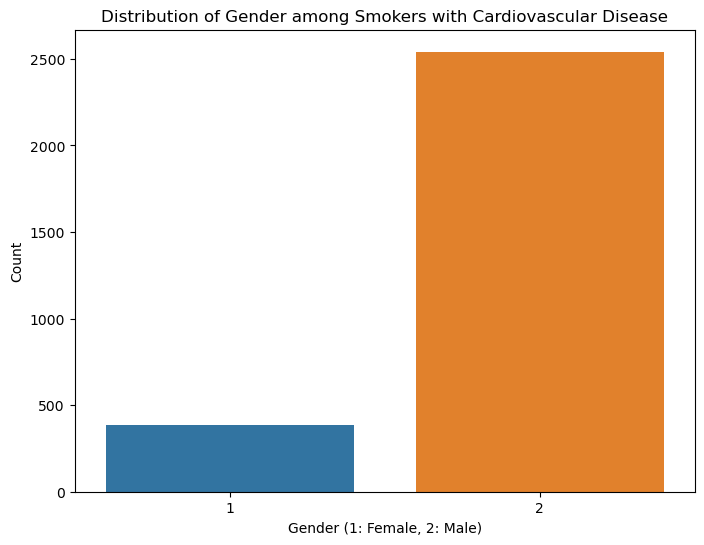

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Example: Filter by smokers with cardiovascular disease
    smokers_with_cardio = df[(df['smoke'] == 1) & (df['cardio'] == 1)]

    # Print the DataFrame
    print("Smokers with cardiovascular disease:")
    print(smokers_with_cardio)

    # Count plot to visualize the distribution of gender
    plt.figure(figsize=(8, 6))
    sns.countplot(x='gender', data=smokers_with_cardio)
    plt.title('Distribution of Gender among Smokers with Cardiovascular Disease')
    plt.xlabel('Gender (1: Female, 2: Male)')
    plt.ylabel('Count')
    plt.show()

except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)


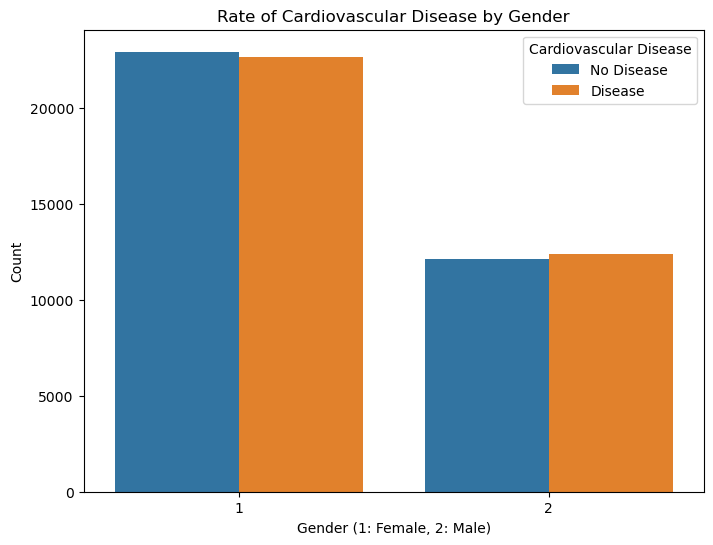

In [ ]:

try:
    # Count plot to visualize the rate of cardiovascular disease between males and females
    plt.figure(figsize=(8, 6))
    sns.countplot(x='gender', hue='cardio', data=df)
    plt.title('Rate of Cardiovascular Disease by Gender')
    plt.xlabel('Gender (1: Female, 2: Male)')
    plt.ylabel('Count')
    plt.legend(title='Cardiovascular Disease', labels=['No Disease', 'Disease'])
    plt.show()

except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)

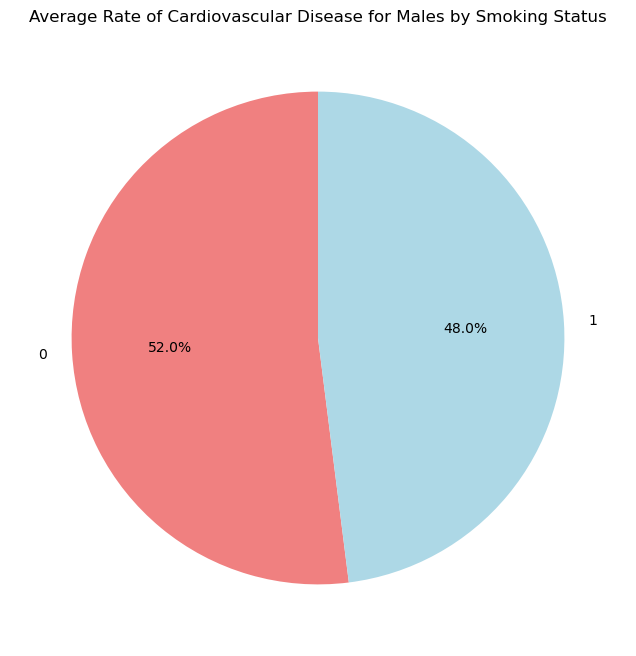

Average Rate of Cardiovascular Disease for Males:
smoke
0    0.513893
1    0.474421
Name: cardio, dtype: float64


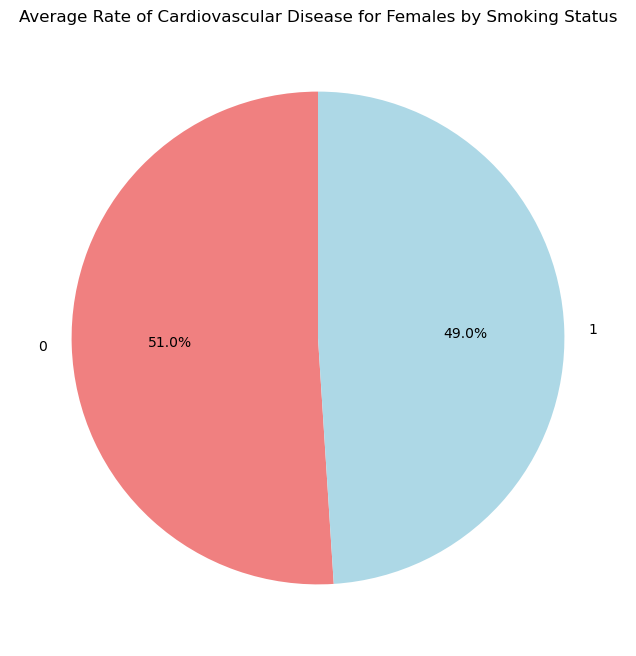

Average Rate of Cardiovascular Disease for Females:
smoke
0    0.497103
1    0.477245
Name: cardio, dtype: float64


In [ ]:
# average rate of cardiovascular disease between smokers and non-smokers both male and female
try:
    # Separate the data for males and females
    male_data = df[df['gender'] == 2]
    female_data = df[df['gender'] == 1]

    # Calculate the average rate of cardiovascular disease for males
    avg_values_male = male_data.groupby('smoke')['cardio'].mean()

    # Pie chart for males
    plt.figure(figsize=(8, 8))
    plt.pie(avg_values_male, labels=avg_values_male.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
    plt.title('Average Rate of Cardiovascular Disease for Males by Smoking Status')
    plt.show()

    # Print the average values for males
    print('Average Rate of Cardiovascular Disease for Males:')
    print(avg_values_male)

    # Calculate the average rate of cardiovascular disease for females
    avg_values_female = female_data.groupby('smoke')['cardio'].mean()

    # Pie chart for females
    plt.figure(figsize=(8, 8))
    plt.pie(avg_values_female, labels=avg_values_female.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
    plt.title('Average Rate of Cardiovascular Disease for Females by Smoking Status')
    plt.show()

    # Print the average values for females
    print('Average Rate of Cardiovascular Disease for Females:')
    print(avg_values_female)

except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)


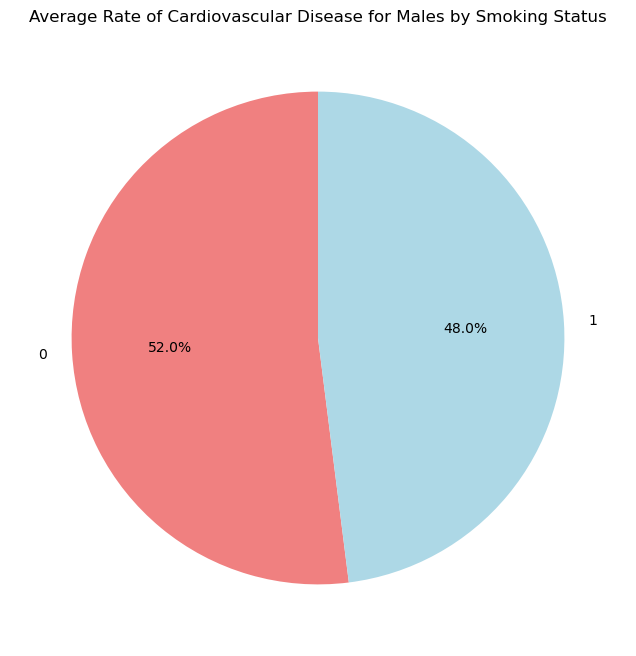

Average Rate of Cardiovascular Disease for Males:
Non-Smoker: 51.39%
Smoker: 47.44%


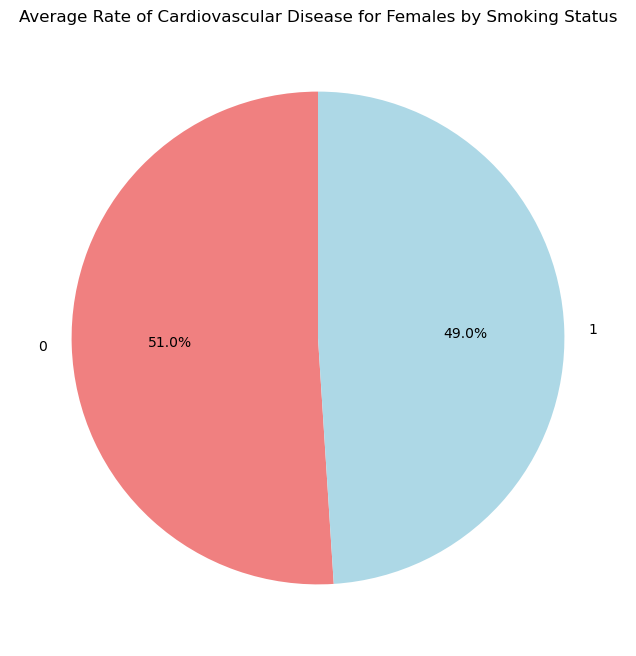


Average Rate of Cardiovascular Disease for Females:
Non-Smoker: 49.71%
Smoker: 47.72%


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Separate the data for males and females
    male_data = df[df['gender'] == 2]
    female_data = df[df['gender'] == 1]

    # Calculate the average rate of cardiovascular disease for males
    avg_values_male = male_data.groupby('smoke')['cardio'].mean()

    # Pie chart for males
    plt.figure(figsize=(8, 8))
    plt.pie(avg_values_male, labels=avg_values_male.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
    plt.title('Average Rate of Cardiovascular Disease for Males by Smoking Status')
    plt.show()

    # Print the average values for males
    print('Average Rate of Cardiovascular Disease for Males:')
    for smoke_status, avg_rate in avg_values_male.items():
        # Update labels for more clarity
        label = 'Non-Smoker' if smoke_status == 0 else 'Smoker'
        print(f'{label}: {avg_rate:.2%}')

    # Calculate the average rate of cardiovascular disease for females
    avg_values_female = female_data.groupby('smoke')['cardio'].mean()

    # Pie chart for females
    plt.figure(figsize=(8, 8))
    plt.pie(avg_values_female, labels=avg_values_female.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
    plt.title('Average Rate of Cardiovascular Disease for Females by Smoking Status')
    plt.show()

    # Print the average values for females
    print('\nAverage Rate of Cardiovascular Disease for Females:')
    for smoke_status, avg_rate in avg_values_female.items():
        # Update labels for more clarity
        label = 'Non-Smoker' if smoke_status == 0 else 'Smoker'
        print(f'{label}: {avg_rate:.2%}')

except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)


In [ ]:
# Explore Blood Pressure (Systolic and Diastolic):
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Bar plot to visualize the average blood pressure among those with and without cardiovascular disease
    plt.figure(figsize=(12, 8))
    sns.barplot(x='cardio', y='ap_hi', data=df, ci=None)
    plt.title('Average Systolic Blood Pressure by Cardiovascular Disease Status of both male and female')
    plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
    plt.ylabel('Average Systolic Blood Pressure')
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.barplot(x='cardio', y='ap_lo', data=df, ci=None)
    plt.title('Average Diastolic Blood Pressure by Cardiovascular Disease Status both male and female')
    plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
    plt.ylabel('Average Diastolic Blood Pressure')
    plt.show()

except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)



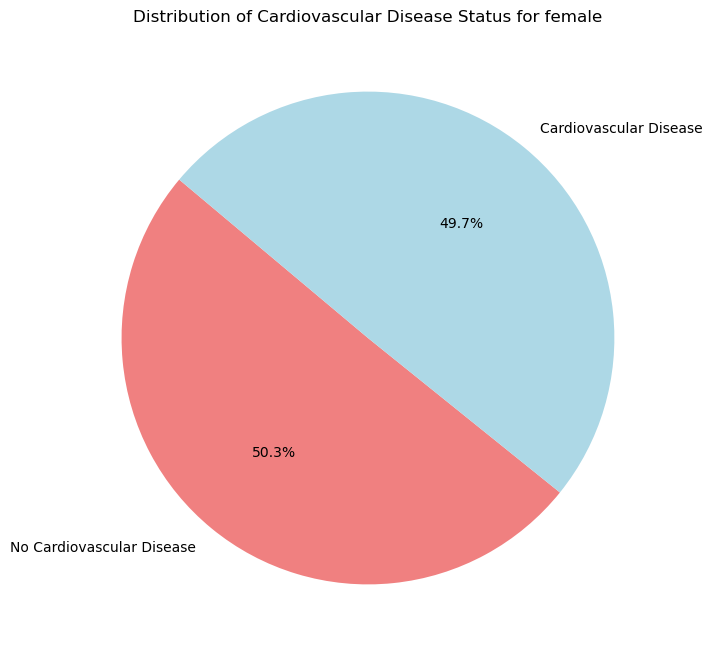

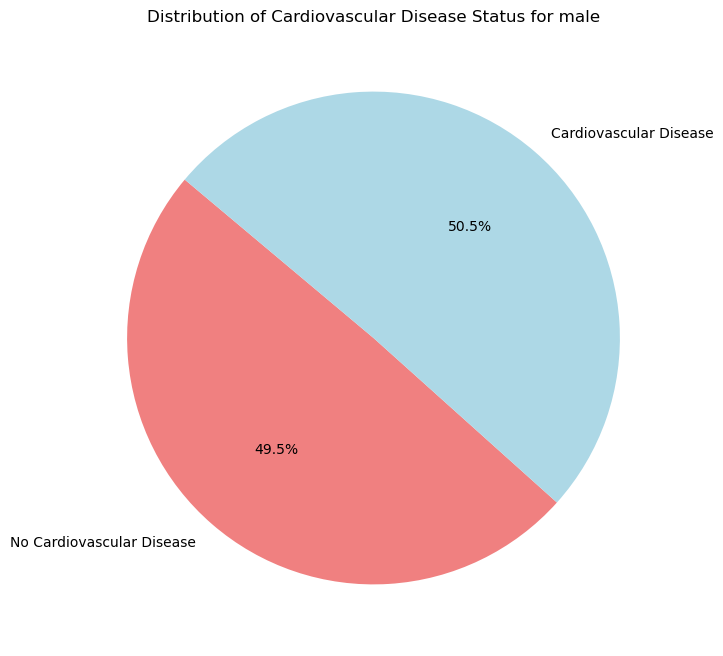

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Create a DataFrame for counting the occurrences of cardiovascular disease status by gender
    count_df = df.groupby(['gender', 'cardio']).size().reset_index(name='count')

    # Create pie charts for each gender
    for gender in count_df['gender'].unique():
        gender_name = 'female' if gender == 1 else 'male'
        gender_data = count_df[count_df['gender'] == gender]

        plt.figure(figsize=(8, 8))
        plt.pie(gender_data['count'], labels=gender_data['cardio'].map({0: 'No Cardiovascular Disease', 1: 'Cardiovascular Disease'}),
                autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
        plt.title(f'Distribution of Cardiovascular Disease Status for {gender_name}')
        plt.show()

except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)


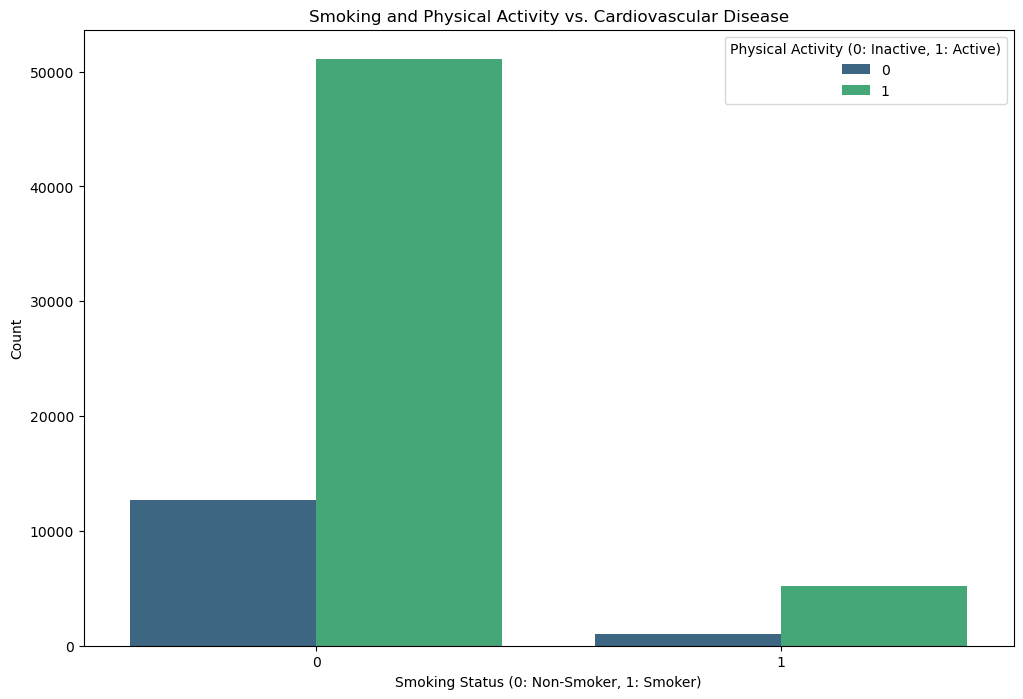

In [ ]:
# 3. Study the Connection between Smoking and Physical Activity

try:
    # Count plot to visualize the distribution of smoking and physical activity among those with and without cardiovascular disease
    plt.figure(figsize=(12, 8))
    sns.countplot(x='smoke', hue='active', data=df, palette='viridis', hue_order=[0, 1])
    plt.title('Smoking and Physical Activity vs. Cardiovascular Disease')
    plt.xlabel('Smoking Status (0: Non-Smoker, 1: Smoker)')
    plt.ylabel('Count')
    plt.legend(title='Physical Activity (0: Inactive, 1: Active)')
    plt.show()

except Exception as e:
    err_msg = str(e)
    print('**Error**: ' + err_msg)